<b> ZURICH DOGS STUDY <b>

QUESTIONS TO ASK:

    1- Which age group owns the most dogs?
    
    2- How does this trend advance in three years from 2015 to 2017?
    
    3- Which age group owns the most 'Terrier' breeds?
    
    4- Which district seems to own the most Terrier dogs?
    
    5- Which is the most common color in terrier dogs?
    
   Note: These questions were designed with a scenario that a terrier breeder client wanted to learn their target age-group and target district in Zurich in order to advertise their terrier/terrier mix dogs. 

In [129]:
##Code task 1#
#Import pandas, matplotlib.pyplot, and seaborn in the correct lines below
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

from library.sb_utils import save_file
import plotly.express as px

In [130]:
 #the supplied CSV data files 
dog_data15 = pd.read_csv('20151001hundehalter.csv')
dog_data16 = pd.read_csv('20160307hundehalter.csv')
dog_data17 = pd.read_csv('20170308hundehalter.csv')


In [131]:
# let's take a look at the datasets of 3 years
dog_data15.head()

,HALTER_ID,ALTER,GESCHLECHT,STADTKREIS,STADTQUARTIER,RASSE1,RASSE1_MISCHLING,RASSE2,RASSE2_MISCHLING,RASSENTYP,GEBURTSJAHR_HUND,GESCHLECHT_HUND,HUNDEFARBE
0,126,51-60,m,9.0,92.0,Welsh Terrier,NaN,NaN,NaN,K,2011,w,schwarz/braun
1,574,61-70,w,2.0,23.0,Cairn Terrier,NaN,NaN,NaN,K,2002,w,brindle
2,695,41-50,m,6.0,63.0,Labrador Retriever,NaN,NaN,NaN,I,2012,w,braun
3,893,61-70,w,7.0,71.0,Mittelschnauzer,NaN,NaN,NaN,I,2010,w,schwarz
4,1177,51-60,m,10.0,102.0,Shih Tzu,NaN,NaN,NaN,K,2011,m,schwarz/weiss


In [132]:
dog_data16.head()

,HALTER_ID,ALTER,GESCHLECHT,STADTKREIS,STADTQUARTIER,RASSE1,RASSE1_MISCHLING,RASSE2,RASSE2_MISCHLING,RASSENTYP,GEBURTSJAHR_HUND,GESCHLECHT_HUND,HUNDEFARBE
0,126,51-60,m,9.0,92.0,Welsh Terrier,NaN,NaN,NaN,K,2011,w,schwarz/braun
1,171,61-70,m,3.0,31.0,Berner Sennenhund,NaN,NaN,NaN,I,2009,m,tricolor
2,574,61-70,w,2.0,23.0,Cairn Terrier,NaN,NaN,NaN,K,2002,w,brindle
3,695,41-50,m,6.0,63.0,Labrador Retriever,NaN,NaN,NaN,I,2012,w,braun
4,893,61-70,w,7.0,71.0,Mittelschnauzer,NaN,NaN,NaN,I,2010,w,schwarz


In [133]:
dog_data17.head()

,HALTER_ID,ALTER,GESCHLECHT,STADTKREIS,STADTQUARTIER,RASSE1,RASSE1_MISCHLING,RASSE2,RASSE2_MISCHLING,RASSENTYP,GEBURTSJAHR_HUND,GESCHLECHT_HUND,HUNDEFARBE
0,126,61-70,m,9.0,92.0,Welsh Terrier,NaN,NaN,NaN,K,2011,w,schwarz/braun
1,171,61-70,m,3.0,31.0,Berner Sennenhund,NaN,NaN,NaN,I,2009,m,tricolor
2,574,61-70,w,2.0,23.0,Mischling gross,NaN,NaN,NaN,I,2013,w,schwarz
3,695,41-50,m,6.0,63.0,Labrador Retriever,NaN,NaN,NaN,I,2012,w,braun
4,893,61-70,w,7.0,71.0,Mittelschnauzer,NaN,NaN,NaN,I,2010,w,schwarz


ALTER -> Age
GESCHLECHT -> Gender
STADTKREIS -> City Quarter or District
RASSE1 -> Dog's Primary Breed
RASSE2 -> Dog's Secondary Breed
GEBURTSJAHR_HUND -> Dog's Year of Birth
GESCHLECHT_HUND -> Dog's Gender
HUNDEFARBE -> Dog's Color

In [134]:
#Translating the German columns into English
dog_data15.columns = ["OWNER_ID", "AGE", "GENDER", "CITY QUARTER", "DISTRICT", 
                      "PRIMARY BREED", "PRIMARY BREEDMIX", "SECONDARY BREED", 
                      "SECONDARY BREEDMIX", "BREED TYPE", "BIRTH YEAR (DOG)", 
                      "GENDER (DOG)", "COLOR (DOG)"]

In [135]:
#checking the translated columns
dog_data15.head()

,OWNER_ID,AGE,GENDER,CITY QUARTER,DISTRICT,PRIMARY BREED,PRIMARY BREEDMIX,SECONDARY BREED,SECONDARY BREEDMIX,BREED TYPE,BIRTH YEAR (DOG),GENDER (DOG),COLOR (DOG)
0,126,51-60,m,9.0,92.0,Welsh Terrier,NaN,NaN,NaN,K,2011,w,schwarz/braun
1,574,61-70,w,2.0,23.0,Cairn Terrier,NaN,NaN,NaN,K,2002,w,brindle
2,695,41-50,m,6.0,63.0,Labrador Retriever,NaN,NaN,NaN,I,2012,w,braun
3,893,61-70,w,7.0,71.0,Mittelschnauzer,NaN,NaN,NaN,I,2010,w,schwarz
4,1177,51-60,m,10.0,102.0,Shih Tzu,NaN,NaN,NaN,K,2011,m,schwarz/weiss


In [136]:
# doing the same translation for 2016 dataset
dog_data16.columns = ["OWNER_ID", "AGE", "GENDER", "CITY QUARTER", "DISTRICT", 
                      "PRIMARY BREED", "PRIMARY BREEDMIX", "SECONDARY BREED", 
                      "SECONDARY BREEDMIX", "BREED TYPE", "BIRTH YEAR (DOG)", 
                      "GENDER (DOG)", "COLOR (DOG)"]
dog_data16.head()

,OWNER_ID,AGE,GENDER,CITY QUARTER,DISTRICT,PRIMARY BREED,PRIMARY BREEDMIX,SECONDARY BREED,SECONDARY BREEDMIX,BREED TYPE,BIRTH YEAR (DOG),GENDER (DOG),COLOR (DOG)
0,126,51-60,m,9.0,92.0,Welsh Terrier,NaN,NaN,NaN,K,2011,w,schwarz/braun
1,171,61-70,m,3.0,31.0,Berner Sennenhund,NaN,NaN,NaN,I,2009,m,tricolor
2,574,61-70,w,2.0,23.0,Cairn Terrier,NaN,NaN,NaN,K,2002,w,brindle
3,695,41-50,m,6.0,63.0,Labrador Retriever,NaN,NaN,NaN,I,2012,w,braun
4,893,61-70,w,7.0,71.0,Mittelschnauzer,NaN,NaN,NaN,I,2010,w,schwarz


In [137]:
# # doing the same translation for 2017 dataset

dog_data17.columns = ["OWNER_ID", "AGE", "GENDER", "CITY QUARTER", "DISTRICT", 
                      "PRIMARY BREED", "PRIMARY BREEDMIX", "SECONDARY BREED", 
                      "SECONDARY BREEDMIX", "BREED TYPE", "BIRTH YEAR (DOG)", 
                      "GENDER (DOG)", "COLOR (DOG)"]
dog_data17.head()

,OWNER_ID,AGE,GENDER,CITY QUARTER,DISTRICT,PRIMARY BREED,PRIMARY BREEDMIX,SECONDARY BREED,SECONDARY BREEDMIX,BREED TYPE,BIRTH YEAR (DOG),GENDER (DOG),COLOR (DOG)
0,126,61-70,m,9.0,92.0,Welsh Terrier,NaN,NaN,NaN,K,2011,w,schwarz/braun
1,171,61-70,m,3.0,31.0,Berner Sennenhund,NaN,NaN,NaN,I,2009,m,tricolor
2,574,61-70,w,2.0,23.0,Mischling gross,NaN,NaN,NaN,I,2013,w,schwarz
3,695,41-50,m,6.0,63.0,Labrador Retriever,NaN,NaN,NaN,I,2012,w,braun
4,893,61-70,w,7.0,71.0,Mittelschnauzer,NaN,NaN,NaN,I,2010,w,schwarz


In [138]:
#checking which column can be eliminated
dog_data15.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6980 entries, 0 to 6979
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   OWNER_ID            6980 non-null   int64  
 1   AGE                 6978 non-null   object 
 2   GENDER              6980 non-null   object 
 3   CITY QUARTER        6978 non-null   float64
 4   DISTRICT            6978 non-null   float64
 5   PRIMARY BREED       6980 non-null   object 
 6   PRIMARY BREEDMIX    668 non-null    object 
 7   SECONDARY BREED     537 non-null    object 
 8   SECONDARY BREEDMIX  0 non-null      float64
 9   BREED TYPE          6806 non-null   object 
 10  BIRTH YEAR (DOG)    6980 non-null   int64  
 11  GENDER (DOG)        6980 non-null   object 
 12  COLOR (DOG)         6980 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 709.0+ KB


In [139]:
dog_data16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6930 entries, 0 to 6929
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   OWNER_ID            6930 non-null   int64  
 1   AGE                 6928 non-null   object 
 2   GENDER              6930 non-null   object 
 3   CITY QUARTER        6928 non-null   float64
 4   DISTRICT            6928 non-null   float64
 5   PRIMARY BREED       6930 non-null   object 
 6   PRIMARY BREEDMIX    653 non-null    object 
 7   SECONDARY BREED     510 non-null    object 
 8   SECONDARY BREEDMIX  0 non-null      float64
 9   BREED TYPE          6930 non-null   object 
 10  BIRTH YEAR (DOG)    6930 non-null   int64  
 11  GENDER (DOG)        6930 non-null   object 
 12  COLOR (DOG)         6930 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 704.0+ KB


In [140]:
dog_data17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7155 entries, 0 to 7154
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   OWNER_ID            7155 non-null   int64  
 1   AGE                 7154 non-null   object 
 2   GENDER              7155 non-null   object 
 3   CITY QUARTER        7154 non-null   float64
 4   DISTRICT            7154 non-null   float64
 5   PRIMARY BREED       7155 non-null   object 
 6   PRIMARY BREEDMIX    618 non-null    object 
 7   SECONDARY BREED     543 non-null    object 
 8   SECONDARY BREEDMIX  0 non-null      float64
 9   BREED TYPE          7155 non-null   object 
 10  BIRTH YEAR (DOG)    7155 non-null   int64  
 11  GENDER (DOG)        7155 non-null   object 
 12  COLOR (DOG)         7155 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 726.8+ KB


In [141]:
# dropping secondary breedmix column since it has no value.
dog_data15.drop('SECONDARY BREEDMIX', axis=1, inplace=True)
dog_data16.drop('SECONDARY BREEDMIX', axis=1, inplace=True)
dog_data17.drop('SECONDARY BREEDMIX', axis=1, inplace=True)

(7155, 12)

In [143]:
# checking the breeds
print (dog_data15['PRIMARY BREED'].unique())

['Welsh Terrier' 'Cairn Terrier' 'Labrador Retriever' 'Mittelschnauzer'
 'Shih Tzu' 'Dackel' 'Bichon frisé' 'Zwergdackel' 'Bergamasker'
 'Border Collie' 'Pinscher' 'Chihuahua' 'West Highland White Terrier'
 'Mischling klein' 'Golden Retriever' 'Weimaraner' 'Tibetan Spaniel'
 'Leonberger' 'Shiba Inu' 'Beagle' 'Lagotto Romagnolo' 'Border Terrier'
 'Magyar Viszla' 'Prager Rattler' 'Französische Bulldogge'
 'Cocker Spaniel' 'Zwergrauhaardackel' 'Jack Russel Terrier' 'Mops'
 'Appenzeller' 'Staffordshire Bull Terrier' 'Grosspudel' 'Spitz'
 'Englische Bulldogge' 'English Springer Spaniel' 'Malteser' 'Dobermann'
 'Langhaardackel' 'Husky' 'Bolonka Zwetna' 'Kleinspitz' 'Toypudel'
 'Terrier' 'Berger blanc Suisse' 'Zwergpudel' 'Foxterrier' 'Kooiker'
 'Mittelpudel' 'Yorkshire Terrier' 'Boxer' 'Pudel' 'Belgischer Schäfer'
 'Deutscher Schäfer' 'Berner Sennenhund' 'Chow Chow' 'Mudi' 'Papillon'
 'Dachshund' 'Tibet Terrier' 'Italienisches Windspiel'
 'Holländischer Schäfer' 'Welsh Springer Spaniel' 'Deu

<b>1- Which age group has the most dogs?<b>

In [144]:
# counting dogs for each age group

age_distro15 = dog_data15.AGE.value_counts()  # Counting how many dogs each age group has
# creating a dataframe with year, age and count columns for 2015

df_age15 = pd.DataFrame(age_distro15)
#creating a year column to indicate the year on graphs
df_age15['YEAR'] = 2015
df_age15.reset_index(inplace=True)
df_age15.columns = ['AGE', 'COUNT', 'YEAR']
df_age15.head()

,AGE,COUNT,YEAR
0,51-60,1512,2015
1,41-50,1491,2015
2,31-40,1266,2015
3,61-70,1043,2015
4,21-30,786,2015


In [145]:
# creating a dataframe with year, age and count columns for 2016 and 2017


age_distro16 = dog_data16.AGE.value_counts()  # counting dogs for each age group

df_age16 = pd.DataFrame(age_distro16)
#creating a year column to indicate the year on graphs
df_age16['YEAR'] = 2016
df_age16.reset_index(inplace=True)
df_age16.columns = ['AGE', 'COUNT', 'YEAR']
df_age16.head()

age_distro17 = dog_data17.AGE.value_counts()  # counting dogs for each age group

df_age17 = pd.DataFrame(age_distro16)
#creating a year column to indicate the year on graphs
df_age17['YEAR'] = 2017
df_age17.reset_index(inplace=True)
df_age17.columns = ['AGE', 'COUNT', 'YEAR']
df_age17.head()

#merging dataframes of all 3 years
df2 = pd.concat([df_age15, df_age16, df_age17], ignore_index=True,axis=0)

print(df2)


       AGE  COUNT  YEAR
0    51-60   1512  2015
1    41-50   1491  2015
2    31-40   1266  2015
3    61-70   1043  2015
4    21-30    786  2015
5    71-80    644  2015
6    81-90    179  2015
7    11-20     41  2015
8   91-100     16  2015
9    51-60   1500  2016
10   41-50   1492  2016
11   31-40   1293  2016
12   61-70   1011  2016
13   21-30    762  2016
14   71-80    640  2016
15   81-90    173  2016
16   11-20     41  2016
17  91-100     16  2016
18   51-60   1500  2017
19   41-50   1492  2017
20   31-40   1293  2017
21   61-70   1011  2017
22   21-30    762  2017
23   71-80    640  2017
24   81-90    173  2017
25   11-20     41  2017
26  91-100     16  2017


<AxesSubplot:title={'center':'Owner age distribution in 2015'}, xlabel='AGE'>

<Figure size 1008x576 with 0 Axes>

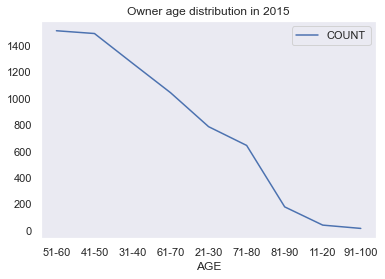

In [146]:
#plotting the age distribution
plt.figure(figsize=(14, 8))
df_age15.plot(x= 'AGE', y= 'COUNT',
    kind="line",
    title= "Owner age distribution in 2015")

There are most dog owners in the age group 51-60 in 2015. It looks like the mid-age groups tend to own dogs more.


<b>2- How does this trend advance in three years from 2015 to 2017?</b>

<AxesSubplot:xlabel='AGE', ylabel='COUNT'>

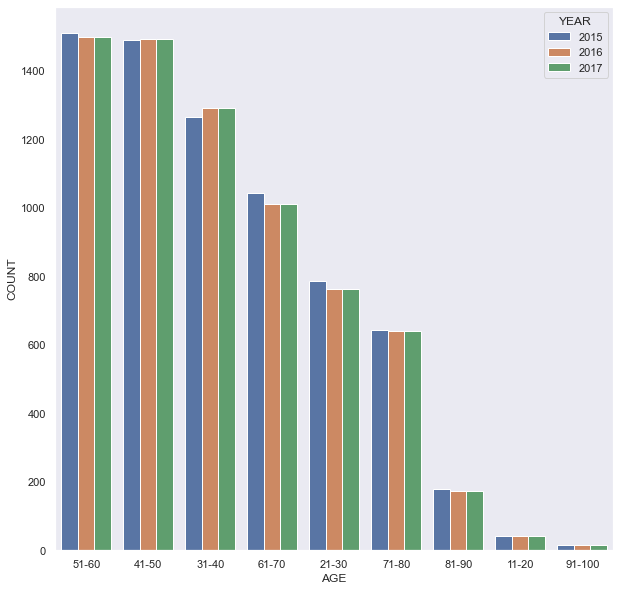

In [147]:
#Plotting a grouped bar graph to show dog counts for each age group comparing in each year.

# Set the figure size
plt.figure(figsize=(10, 10))

#set seaborn plotting aesthetics
sns.set(style='dark')

#create grouped bar chart
sns.barplot(x= 'AGE', y = 'COUNT', hue='YEAR', data= df2) 

The dog counts don't seem to differ that much compared to each year.

<b>3- Which age group has the most 'Terrier' breeds?<b>


In [148]:
# Creating a year column to the main dataframes before merging them.
dog_data15['YEAR'] = 2015
dog_data16['YEAR'] = 2016
dog_data17['YEAR'] = 2017
#Merging all tables 
df4 = pd.concat([dog_data15, dog_data16, dog_data17], ignore_index=True,axis=0)

print(df4)

       OWNER_ID    AGE GENDER  CITY QUARTER  DISTRICT       PRIMARY BREED  \
0           126  51-60      m           9.0      92.0       Welsh Terrier   
1           574  61-70      w           2.0      23.0       Cairn Terrier   
2           695  41-50      m           6.0      63.0  Labrador Retriever   
3           893  61-70      w           7.0      71.0     Mittelschnauzer   
4          1177  51-60      m          10.0     102.0            Shih Tzu   
...         ...    ...    ...           ...       ...                 ...   
21060    135718  31-40      m           9.0      91.0     Mischling gross   
21061    135725  31-40      w           7.0      74.0               Boxer   
21062    135726  11-20      w          11.0     111.0            Pinscher   
21063    135728  31-40      w           7.0      72.0             Whippet   
21064    135731  21-30      m           9.0      91.0      Cocker Spaniel   

      PRIMARY BREEDMIX SECONDARY BREED BREED TYPE  BIRTH YEAR (DOG)  \
0   

In [149]:
# creating a dataframe with terrier only breeds in 2015
terrier15 = dog_data15['PRIMARY BREED'].str.contains('terrier', case = False, na=False)
print(terrier15)

dog_data15['TERRIER'] = terrier15
terrier_data15 = dog_data15[dog_data15["TERRIER"] == True].reset_index(drop=True)
#checking the terrier column
terrier_data15.head()



0        True
1        True
2       False
3       False
4       False
        ...  
6975    False
6976    False
6977    False
6978     True
6979    False
Name: PRIMARY BREED, Length: 6980, dtype: bool


,OWNER_ID,AGE,GENDER,CITY QUARTER,DISTRICT,PRIMARY BREED,PRIMARY BREEDMIX,SECONDARY BREED,BREED TYPE,BIRTH YEAR (DOG),GENDER (DOG),COLOR (DOG),YEAR,TERRIER
0,126,51-60,m,9.0,92.0,Welsh Terrier,NaN,NaN,K,2011,w,schwarz/braun,2015,True
1,574,61-70,w,2.0,23.0,Cairn Terrier,NaN,NaN,K,2002,w,brindle,2015,True
2,4362,61-70,w,7.0,74.0,West Highland White Terrier,NaN,NaN,K,2002,m,weiss,2015,True
3,5227,61-70,m,10.0,101.0,Border Terrier,NaN,NaN,K,2011,w,tricolor,2015,True
4,6314,61-70,m,10.0,101.0,Jack Russel Terrier,NaN,NaN,K,2005,w,tricolor,2015,True


<AxesSubplot:title={'center':'Terrier Owner age distribution in 2015'}>

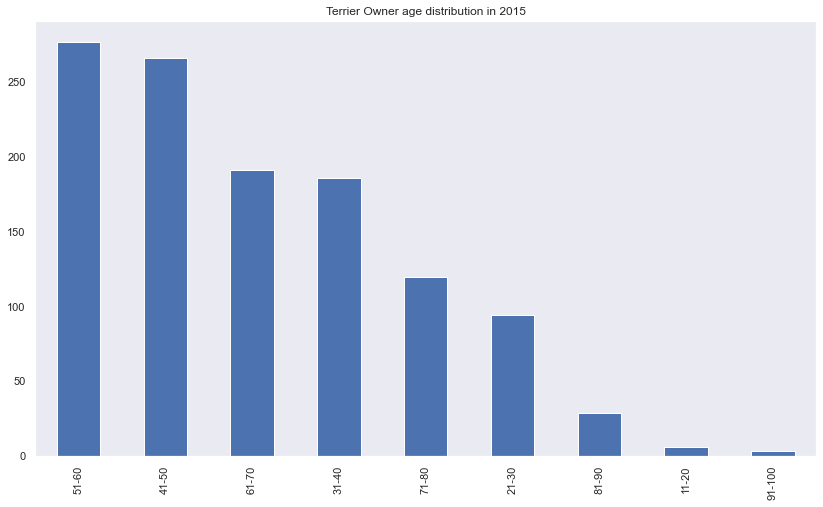

In [150]:
#plotting the age distribution of terrier dogs 
    #2015
plt.figure(figsize=(14, 8))
terrier_data15.AGE.value_counts().plot(
    kind="bar",
    title= "Terrier Owner age distribution in 2015")

The most terrier owners are in the age range 51-60 in 2015 as well. 
However the age range 41-50 has a close race with 51-60.

In [151]:


terrier_distro15 = terrier_data15.AGE.value_counts()  # Counting how many terrier dogs each age group has
# creating a dataframe with year, age and count columns for 2015

df_terrier15 = pd.DataFrame(terrier_distro15)
df_terrier15['YEAR'] = 2015
df_terrier15.reset_index(inplace=True)
df_terrier15.columns = ['AGE', 'TERRIER', 'YEAR']
df_terrier15.head()

#counting terriers by age group for other years.
    #2016
terrier16 = dog_data16['PRIMARY BREED'].str.contains('terrier', case = False, na=False)
print(terrier15)

dog_data16['TERRIER'] = terrier16
terrier_data16 = dog_data16[dog_data16["TERRIER"] == True].reset_index(drop=True)

terrier_distro16 = terrier_data16.AGE.value_counts() 

df_terrier16 = pd.DataFrame(terrier_distro16)
df_terrier16['YEAR'] = 2016
df_terrier16.reset_index(inplace=True)
df_terrier16.columns = ['AGE', 'TERRIER', 'YEAR']
df_terrier16.head()


    #2017
terrier17 = dog_data17['PRIMARY BREED'].str.contains('terrier', case = False, na=False)
print(terrier15)

dog_data17['TERRIER'] = terrier17
terrier_data17 = dog_data17[dog_data17["TERRIER"] == True].reset_index(drop=True)

 
terrier_distro17 = terrier_data17.AGE.value_counts()  # Counting how many dogs each age group has

df_terrier17 = pd.DataFrame(terrier_distro17)
df_terrier17['YEAR'] = 2017
df_terrier17.reset_index(inplace=True)
df_terrier17.columns = ['AGE', 'TERRIER', 'YEAR']
df_terrier17.head()

#merging dataframes of all 3 years for terriers
df_terrier = pd.concat([df_terrier15, df_terrier16, df_terrier17], ignore_index=True,axis=0)


0        True
1        True
2       False
3       False
4       False
        ...  
6975    False
6976    False
6977    False
6978     True
6979    False
Name: PRIMARY BREED, Length: 6980, dtype: bool
0        True
1        True
2       False
3       False
4       False
        ...  
6975    False
6976    False
6977    False
6978     True
6979    False
Name: PRIMARY BREED, Length: 6980, dtype: bool


<AxesSubplot:xlabel='AGE', ylabel='TERRIER'>

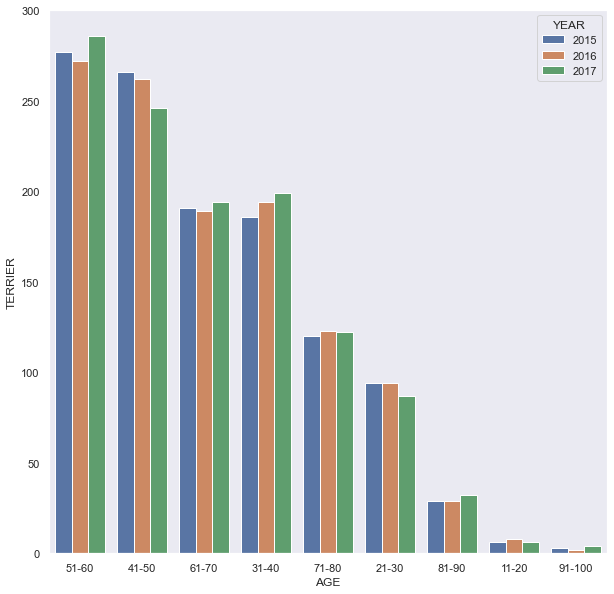

In [152]:
#plot a graph for terriers only
#Plotting a grouped bar graph to show dog counts for each age group comparing in each year.

# Set the figure size
plt.figure(figsize=(10, 10))

#set seaborn plotting aesthetics
sns.set(style='dark')

#create grouped bar chart
sns.barplot(x= 'AGE', y = 'TERRIER', hue='YEAR', data= df_terrier) 

The age group 51-60 has the most terriers in all years. But this age group seems to adopt
more terriers as years pass by.

In [153]:
print (df_terrier['AGE'])

0      51-60
1      41-50
2      61-70
3      31-40
4      71-80
5      21-30
6      81-90
7      11-20
8     91-100
9      51-60
10     41-50
11     31-40
12     61-70
13     71-80
14     21-30
15     81-90
16     11-20
17    91-100
18     51-60
19     41-50
20     31-40
21     61-70
22     71-80
23     21-30
24     81-90
25     11-20
26    91-100
Name: AGE, dtype: object


<b> 5- Which district seems to own the most Terrier dogs? <b>

<AxesSubplot:title={'center':'District distribution in 2015'}>

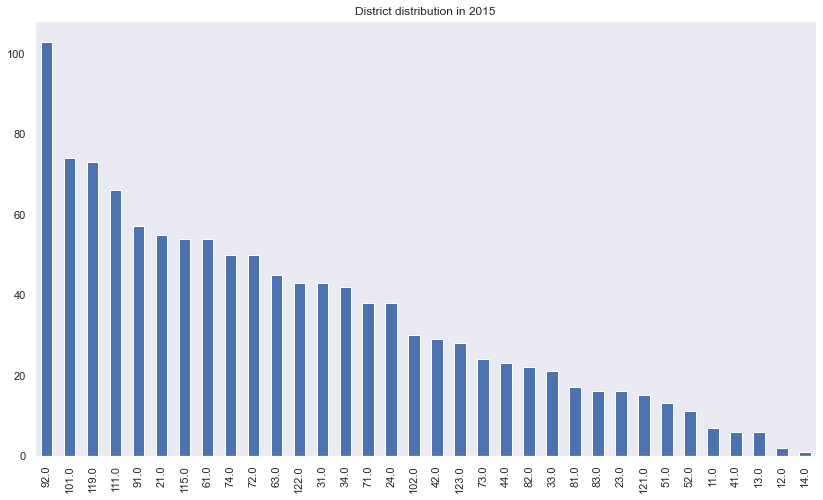

In [154]:
#2015
plt.figure(figsize=(14 , 8))
terrier_data15.DISTRICT.value_counts().plot(
    kind="bar",
    title= "District distribution in 2015")

<AxesSubplot:title={'center':'District distribution in 2016'}>

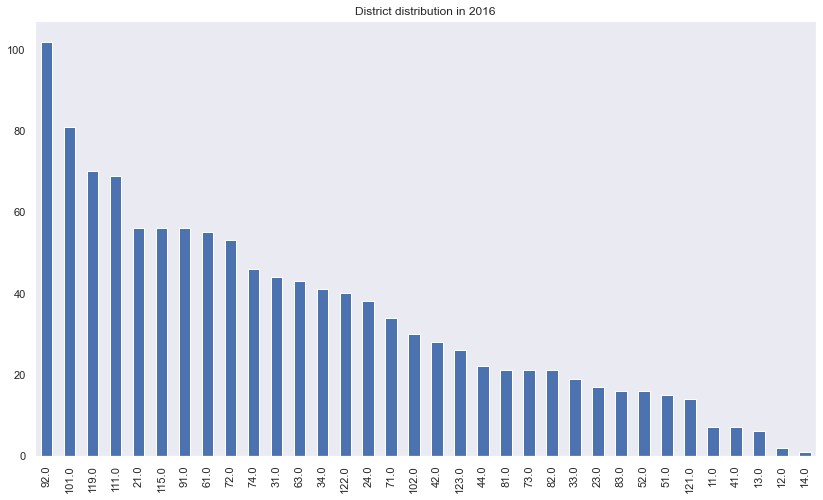

In [155]:
#2016
plt.figure(figsize=(14 , 8))
terrier_data16.DISTRICT.value_counts().plot(
    kind="bar",
    title= "District distribution in 2016")

<AxesSubplot:title={'center':'District distribution in 2017'}>

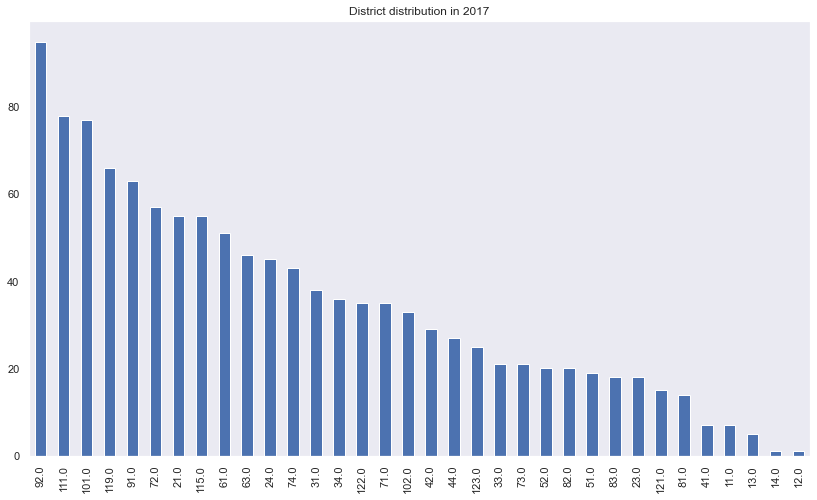

In [156]:
#2017
plt.figure(figsize=(14 , 8))
terrier_data17.DISTRICT.value_counts().plot(
    kind="bar",
    title= "District distribution in 2017")

District# 92 does have the most terrier owners in all three years. Therefore it's the most terrier friendly district. It's followed by #111 and #101.

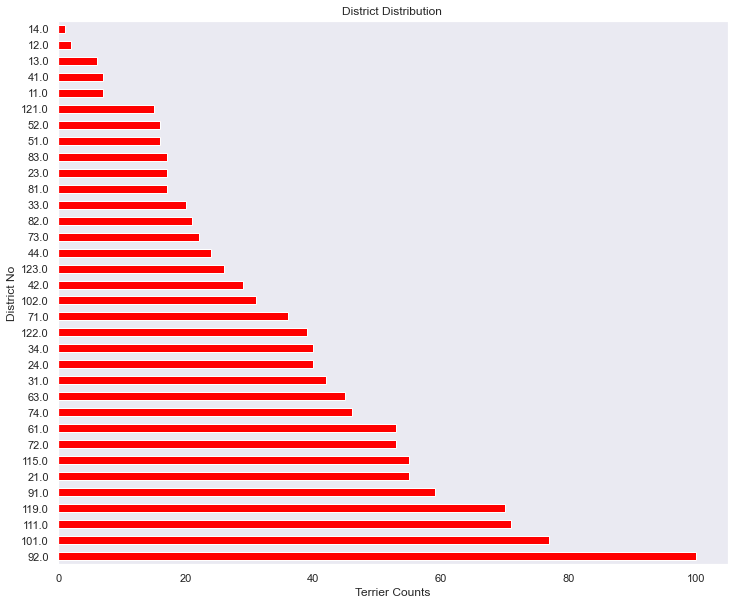

In [157]:
#creating a whole dataframe out of terrier dataframes
terrier_data = pd.concat([terrier_data15, terrier_data16, terrier_data17], ignore_index=True,axis=0)

#creating dataframe with an average number of 3 years
district_distro = round ((terrier_data.DISTRICT.value_counts()/3),0)  # Finding the mean of all three years

plt.figure(figsize=(12 , 10))

district_distro.plot.barh(color ='red')

plt.title('District Distribution ')
plt.ylabel('District No')
plt.xlabel('Terrier Counts')
plt.show()

<b>4- Which is the most common color in Terrier dogs?<b>


In [158]:
#creating a dataframe only with the color (dog) column
df_color = pd.DataFrame(terrier_data['COLOR (DOG)'])
df_color.head(6)

,COLOR (DOG)
0,schwarz/braun
1,brindle
2,weiss
3,tricolor
4,tricolor
5,mahagoni/weiss


In [159]:
df_color['COLOR (DOG)'].unique()

array(['schwarz/braun', 'brindle', 'weiss', 'tricolor', 'mahagoni/weiss',
       'black/tan', 'rot/beige', 'blue/tan', 'rot/grau/schwarz',
       'graubraun', 'beige/braun/schwarz', 'beige', 'schwarz/weiss',
       'weiss/rot', 'schwarz', 'braun/weiss', 'grau/braun', 'red grizzle',
       'weiss/schwarz', 'rot', 'weiss/braun', 'weiss/schwarz/braun',
       'dreifarbig', 'saufarben', 'schwarz/beige', 'steelblue/tan',
       'rot/braun', 'rot/weiss', 'dunkel gestromt', 'silber/braun',
       'braun', 'schwarz/braun/weiss', 'beige/weiss', 'schwarz/gelb',
       'beige/grau', 'weizen', 'blue/steel', 'braun/schwarz',
       'weiss/beige', 'beige/schwarz', 'zobel', 'schwarz/weiss/braun',
       'blondfarben', 'grau', 'grau/schwarz', 'schwarz/braun/grau',
       'braun/beige', 'schwarz gestromt', 'hellbraun', 'gestromt',
       'steelblue', 'rotbraun', 'silbergrau', 'hellbraun/weiss',
       'braun/weiss/schwarz', 'sable', 'fauve', 'braun gestromt',
       'beige/braun', 'goldbraun', 'braun/g

In [160]:
#finding the top five colors of terriers
top5_color = pd.DataFrame(df_color.value_counts().head())
top5_color.reset_index(inplace=True)
top5_color.columns = ['COLOR (DOG)', 'COUNT']
top5_color

,COLOR (DOG),COUNT
0,tricolor,704
1,weiss,327
2,black/tan,268
3,schwarz/braun,228
4,blue/tan,171


The top five colors of terriers are 'tricolor', 'weiss', 'black/tan' and 'schwarz/braun'and 'blue/tan.'

In [99]:
#Translating the top five colors into english
    #importing the modules
import goslate
import googletrans
from googletrans import Translator
gs = goslate.Goslate()
translator = Translator()
pd.set_option('max_colwidth', 300)
# how to get the supported language and their corresponing code
lang_df = pd.DataFrame.from_dict(googletrans.LANGUAGES,  orient='index', columns=['Language'])
#finding code for german
lang_df[lang_df.Language.isin(['german'])]


,Language
de,german


In [100]:
#testing the translation
my_translation = translator.translate("braun", src='de', dest='en')
print(my_translation.text)

brown


In [163]:
#translate the top 5 color palette into English
top5_color['COLOR (DOG)'] = top5_color['COLOR (DOG)'].apply(lambda x: translator.translate(x, src='de', dest='en').text )


In [162]:
print(top5_color['COLOR (DOG)'])

0       tricolor
1          white
2      black/tan
3    black/brown
4       blue/tan
Name: COLOR (DOG), dtype: object


<AxesSubplot:title={'center':'The top 5 colors of Terriers'}, xlabel='COLOR (DOG)', ylabel='COUNT'>

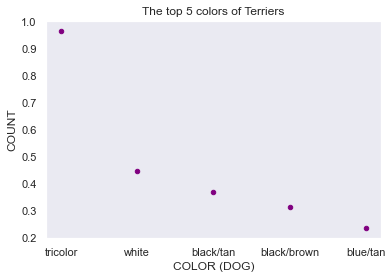

In [170]:
#find the average count for 3 years using scatter plot
top5_color['COUNT'] = top5_color['COUNT']/3
#Plot the bar graph
top5_color.plot(x= 'COLOR (DOG)', y= 'COUNT',
                kind = 'scatter',
                color = 'purple',
                title= "The top 5 colors of Terriers")

<b> Conclusion:<b>

The age groups 51-60 and 41-50 have the most Terrier owners and district 92 followed by 111 and 101 are the most 
terrier friendly districts.The most common color in Terrier berried are tricolor, white and black/tan.